# Simple PCA Example
This is a simple example to show how PCA works and what the principal components represent. First we load the libraries we need. Next we generate some data, we normalize them using the standard scaler, we apply the PCA and plot the components over the normalized data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.rcParams["font.family"] = 'sans'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 18

In [2]:
def DrawVector(v0, v1, ax=None):
    ax = ax or plt.gca()
    ax.annotate('', v1, v0, arrowprops={'arrowstyle': '->', 'linewidth': 2, 'shrinkA': 0, 'shrinkB': 0})

In [3]:
n_samples = 100
random_state=1234
np.random.seed(random_state)

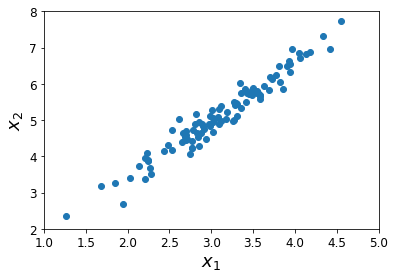

In [4]:
X, y = make_blobs(n_samples=n_samples, centers=1, random_state=random_state,center_box=(2.0, 5.0))
X = np.dot(X,[[0.6, .8], [0.4, .8]])
plt.scatter(X[:,0],X[:,1]);
x_lim = [np.floor(np.min(X[:,0])),np.ceil(np.max(X[:,0]))]
y_lim = [np.floor(np.min(X[:,1])),np.ceil(np.max(X[:,1]))]
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

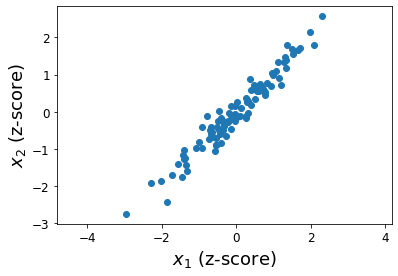

In [5]:
Xs = StandardScaler().fit_transform(X)
plt.scatter(Xs[:,0],Xs[:,1]);
xs_lim = [np.floor(np.min(Xs[:,0])),np.ceil(np.max(Xs[:,0]))]
ys_lim = [np.floor(np.min(Xs[:,1])),np.ceil(np.max(Xs[:,1]))]
plt.xlim(xs_lim)
plt.ylim(ys_lim)
plt.xlabel("$x_1$ (z-score)");
plt.ylabel("$x_2$ (z-score)");
plt.axis('equal');

In [6]:
pca = PCA(n_components=2)
pca.fit(Xs)

PCA(n_components=2)

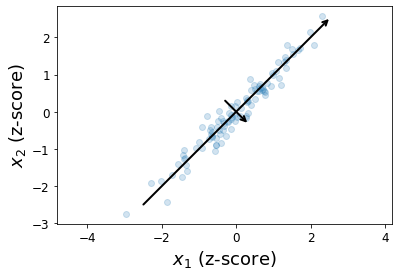

In [7]:
plt.scatter(Xs[:,0],Xs[:,1],alpha=0.2);
xs_lim = [np.floor(np.min(Xs[:,0])),np.ceil(np.max(Xs[:,0]))]
ys_lim = [np.floor(np.min(Xs[:,1])),np.ceil(np.max(Xs[:,1]))]
plt.xlabel("$x_1$ (z-score)");
plt.ylabel("$x_2$ (z-score)");

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2.5 * np.sqrt(length)
    plt.annotate('', pca.mean_-v, pca.mean_+v, arrowprops={'arrowstyle': '->', 'linewidth': 2, 'shrinkA': 0, 'shrinkB': 0})
plt.axis('equal');

If we now project the original data over the two components, we note that the projected data are aligned with respect to the two axis.

In [8]:
Xs_pca = pca.transform(Xs)

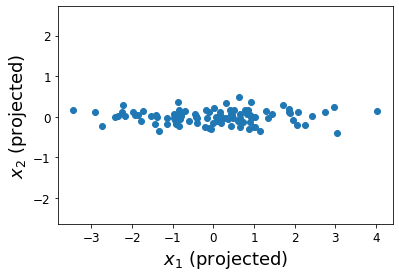

In [9]:
plt.scatter(Xs_pca[:,0],Xs_pca[:,1]);
xs_lim = [np.floor(np.min(Xs[:,0])),np.ceil(np.max(Xs[:,0]))]
ys_lim = [np.floor(np.min(Xs[:,1])),np.ceil(np.max(Xs[:,1]))]
plt.xlim(xs_lim)
plt.ylim(ys_lim)
plt.xlabel("$x_1$ (projected)");
plt.ylabel("$x_2$ (projected)");
plt.axis('equal');